In [24]:
from pathlib import Path
import sys
import os

# Get the project root by finding the directory containing README.md or going up from current location
# This works regardless of where the notebook is located
current_dir = Path(os.getcwd())
project_root = current_dir

# Try to find project root by looking for README.md or going up directories
while project_root != project_root.parent:
    if (project_root / 'README.md').exists() and (project_root / 'src').exists():
        break
    project_root = project_root.parent

# If we're in notebooks/scalogram_analyze/, we can also go up 2 levels
# But the above method is more robust
ROOT_PATH = project_root

# Add to path if not already there
if str(ROOT_PATH) not in sys.path:
    sys.path.insert(0, str(ROOT_PATH))

# Import necessary modules
import yaml
import numpy as np
import matplotlib.pyplot as plt


from src.data.dataset import OrionAEFrameDataset
from src.data.transforms import preprocess
from src.data.transforms import features
from src.data.transforms import (
    BaseTransform,
    FilterPipeline,
    NormPipeline,
    PreprocessPipeline,
    FeaturePipeline,
)


In [31]:
with open(r"/home/serene/orion-ae-study/configs/dataset/example_1.yaml", "r") as f:
    dataset_config = yaml.safe_load(f)['dataset']
    
dataset_config['channels'] = ['A', 'B', 'C', 'D']

preprocess_pipeline = PreprocessPipeline(
    miscs=[preprocess.HanningWindow()]
)

feature_pipeline = FeaturePipeline(
    features=[
        features.CWTScalogramTransform(
            n_scales=10,
            wavelet="cmor",
            min_scale=1,
            max_scale=100,
            sampling_rate=5e6
        )
    ]
)

dataset = OrionAEFrameDataset(
    data_path = r"/home/serene/orion-ae-study/data/raw/segmented_cycles_positive_c1_l42373_c_A_B_C_D_20251222_064606",
    config=dataset_config,
    type="all",
    preprocess_pipeline=preprocess_pipeline,
    # feature_pipeline=feature_pipeline
)

/home/serene/orion-ae-study/venv/lib/python3.10/site-packages/pywt/_functions.py:141: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)
/home/serene/orion-ae-study/src/data/transforms/features/cwt.py:177: UserWarning: freq_max 10000000.0 Hz exceeds Nyquist frequency 2500000.0 Hz. Clamping to 2475000.0 Hz to avoid aliasing.
  warnings.warn(


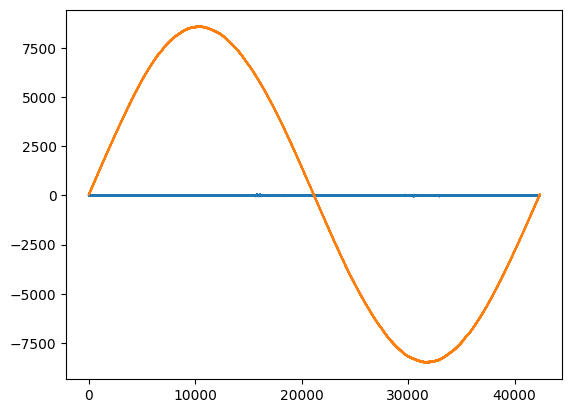

In [50]:
laser_vibrometer = dataset[0]['raw'][3]
plt.plot(dataset[0]['raw'][2])
plt.plot(laser_vibrometer)



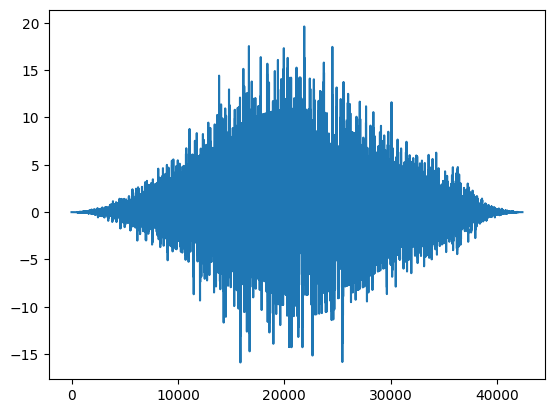

In [44]:
plt.plot(dataset[0]['final'][0].reshape(-1))